In [ ]:
library("adabag")
library("randomForest")
library("e1071")


# 1)

In [2]:
load("TP4.Rdata")


In [4]:
# formula es lo que pones en el metodo para señalar la variable clase
# por ej. class ~ .
calculador.error <- function(train, test, formula) {
    error <- matrix(0, ncol = 2, nrow = 0)
    colnames(error) <- c("altura_arbol", "error")

    for (i in 1:20) {
        adaboost <- boosting(formula, data = train, mfinal = 200, coef = "Freund", control = rpart.control(maxdepth = i))
        pred <- predict(adaboost, newdata = test, type = "class")
        error <- rbind(error, c(i, pred$error))
    }

    return(error)
}


In [4]:
esp_error <- calculador.error(esp_train, esp_test, class ~ .)
diag_error <- calculador.error(diag_train, diag_test, class ~ .)


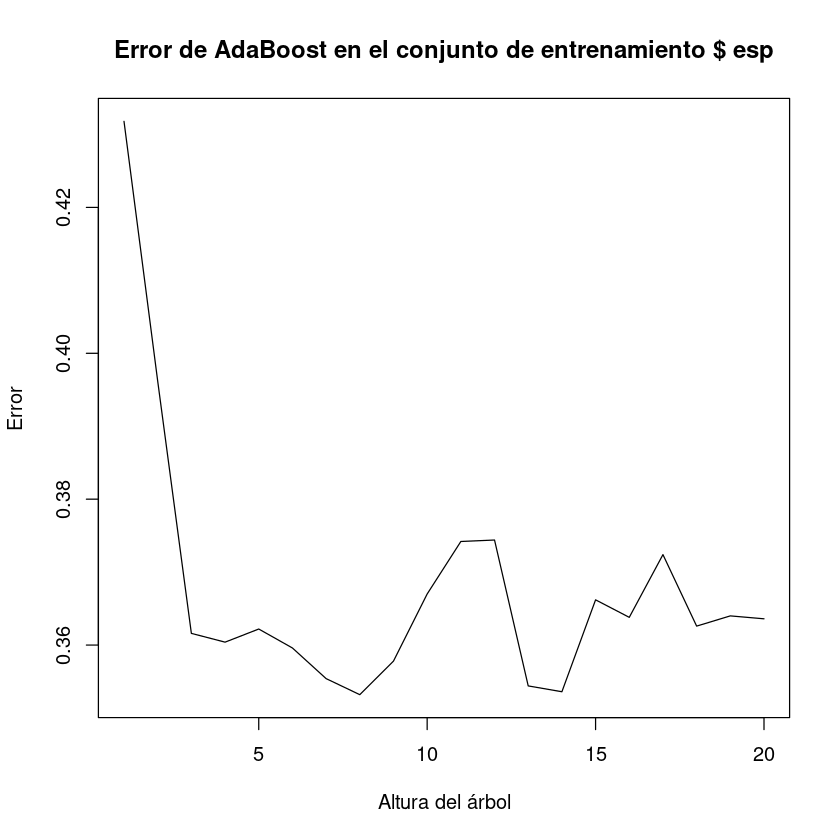

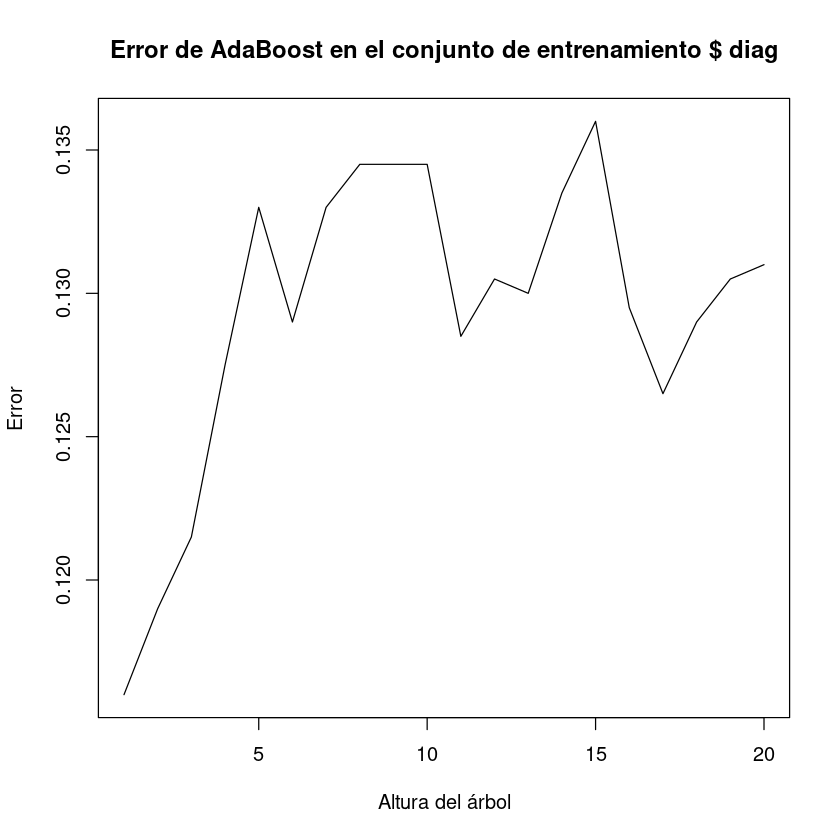

In [5]:
plot(esp_error[, 1], esp_error[, 2], type = "l", xlab = "Altura del árbol", ylab = "Error", main = "Error de AdaBoost en el conjunto de entrenamiento $ esp")
plot(diag_error[, 1], diag_error[, 2], type = "l", xlab = "Altura del árbol", ylab = "Error", main = "Error de AdaBoost en el conjunto de entrenamiento $ diag")


## Comentarios

En los gráficos parece que hay mucho variación pero las escalas estan muy agrandadas.

Me pareció interesante que para el problema diagonal, el error aumente a mayor altura del árbol. Intuyo que cuando la altura es 1, el arbol solo separa los datos en 2 grupos lo que lo lleva a cometer menos errores de sobre-ajuste.

Para el otro caso no tengo opinión. Te dejo los graficos con una escala realista.

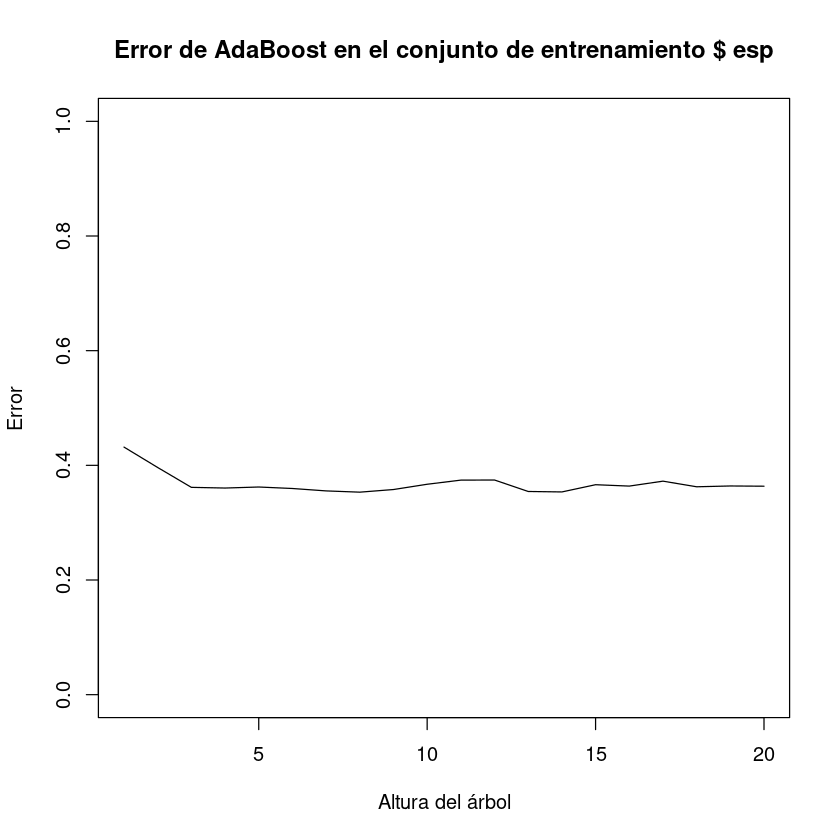

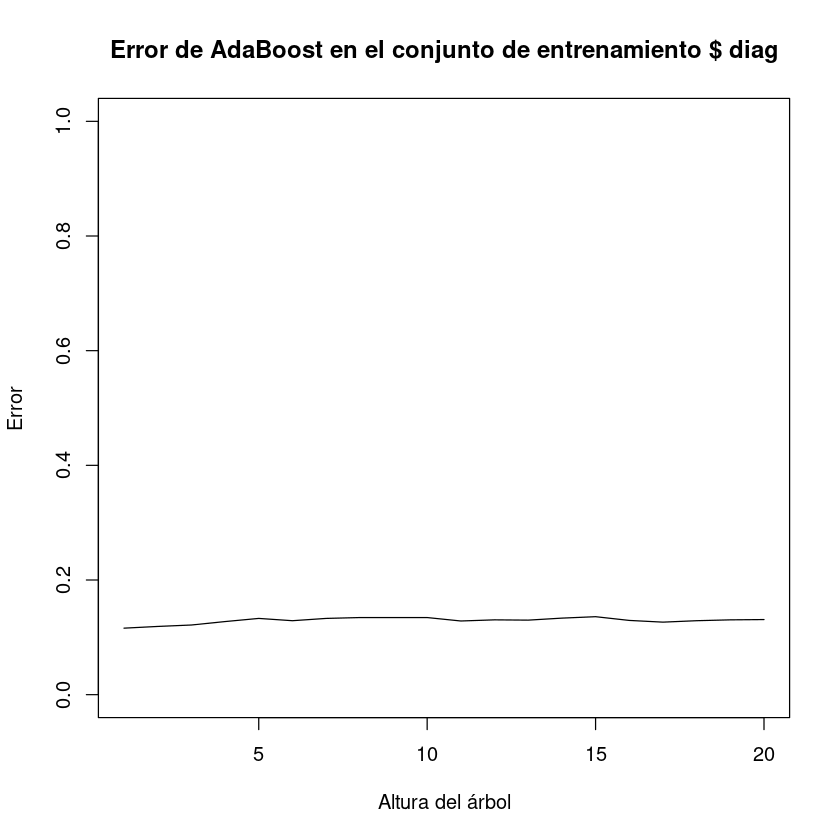

In [44]:
plot(esp_error[, 1], esp_error[, 2], type = "l", xlab = "Altura del árbol", ylab = "Error", main = "Error de AdaBoost en el conjunto de entrenamiento $ esp", ylim = c(0, 1))
plot(diag_error[, 1], diag_error[, 2], type = "l", xlab = "Altura del árbol", ylab = "Error", main = "Error de AdaBoost en el conjunto de entrenamiento $ diag", ylim = c(0, 1))


Aunque el saltito de 1 a 3 variables en espiral se nota un poco más.

# 2)

In [6]:
n.variables <- function(n) {
    r <- c(n)
    p <- floor(n / 2)
    while (p > 0) {
        r <- c(r, p)
        p <- floor(p / 2)
    }
    return(r)
}


In [7]:
# rforest tiene que ser una función que recibe un parametro para aplicar mtry a un dataset
tester.nvars <- function(dataset, formula) {
    n <- ncol(dataset) - 1
    error <- matrix(0, ncol = 2, nrow = 0)
    colnames(error) <- c("n_variables", "error")

    for (i in n.variables(n)) {
        i_error <- c()
        for (j in 1:5) {
            rf <- randomForest(formula, data = dataset, mtry = i, ntree = 1000)
            i_error <- c(i_error, mean((rf$confusion)[, 3]))
        }
        error <- rbind(error, c(i, mean(i_error)))
    }

    return(error)
}


In [8]:
RRL_error <- tester.nvars(RRL, Tipo ~ .)


In [45]:
RRL_error


n_variables,error
69,0.04206799
34,0.03906516
17,0.03886686
8,0.03920680
4,0.03968839
2,0.04144476
1,0.04484419


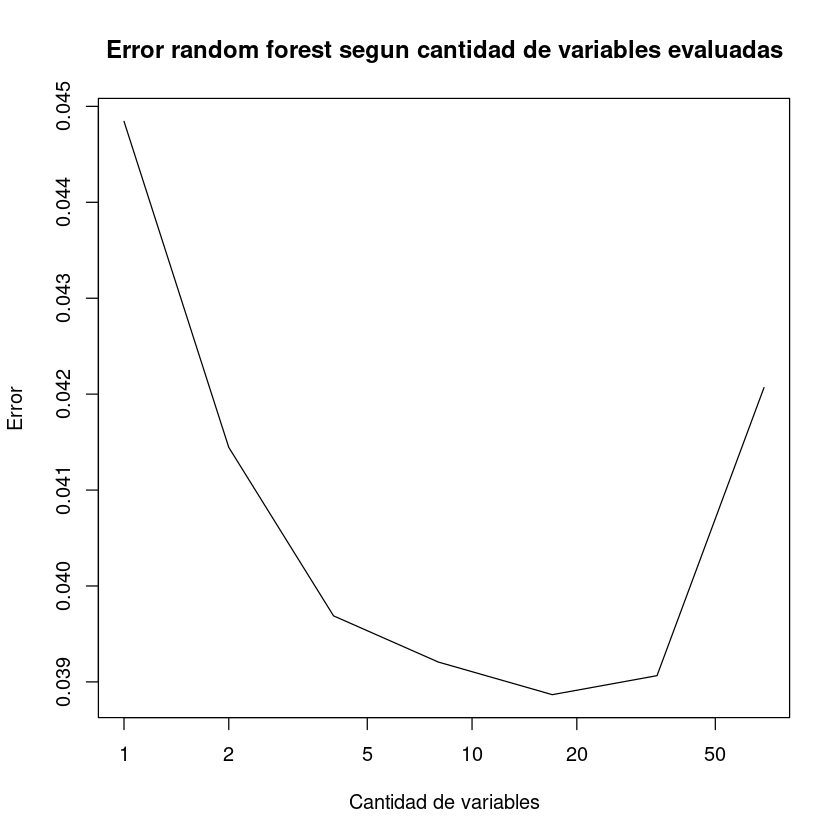

In [9]:
plot(RRL_error[, 1], RRL_error[, 2], type = "l", xlab = "Cantidad de variables", ylab = "Error", main = "Error random forest segun cantidad de variables evaluadas", log = "x")


## Comentarios

El menor porcentaje de error fué con 17 variables que 3.8% de error. Me parece excelente.

No se que opinar la verdad, 17 es 1/4 de las variables, será un dato que me sirva más adelante?

Puedo agregar que me costó una barbaridad entender que en el enunciado pedías ir dividiendo las variables por 2 :).


# 3)

In [10]:
load("lampone.Rdata")
lampone.data <- lampone[, -c(1, 144)] # Quito la columna del año y la que me dijo Gurvich en TP3
dim(lampone.data) # 49 x 142


[1]  49 142

### Error con randomForest

Basandome en el punto 2 creo que el mtry es óptimo en 1/4 de la cantidad de variables (En este caso como tiene 141 variables, el óptimo sería 35). Igualmente voy a correr la misma función con lampone porque la computadora es mía y ejecuto lo que quiero.

In [26]:
lampone_mvars <- tester.nvars(lampone.data, N_tipo ~ .)
lampone_mvars


n_variables,error
141,0.16127946
70,0.14107744
35,0.08670034
17,0.09579125
8,0.10488215
4,0.10942761
2,0.12138047
1,0.14410774


Efectivamente el óptimo fue 35. Me quedo con su error de 8,67% o 0.08670034.

### Error con adaboost

Para elegir el alto del árbol uso la función del primer punto.

In [12]:
set.seed(123)
altura.train <- sample(1:nrow(lampone.data), 0.8 * nrow(lampone.data))
altura.test <- (-altura.train)
lampone.data2 <- lampone.data[sample(nrow(lampone.data)), ]
# Lo mezclo un poco para que no queden datos parecidos juntos


In [13]:
atrain <- lampone.data2[altura.train, ]
atest <- lampone.data2[altura.test, ]
calculador.error(atrain, atest, N_tipo ~ .)


altura_arbol,error
1,0.1
2,0.0
3,0.1
4,0.0
5,0.1
6,0.0
7,0.1
8,0.0
9,0.1
10,0.1


Parece que no importa mucho la altura del árbol mientras sea par, me voy a quedar con 2 para que no me tarde tanto (⌐■_■). 

Como lampone tiene muy pocos datos, creo que la mejor opción sería usar k-fold cross validation para generar train y test.

In [30]:
# Me copié el codigo del TP1 y lo adapté

# method tiene que esperar train y test, y devolver el error
kfold.apply <- function(dataset, method, print = TRUE) {
    kfold <- 5
    folds <- cut(seq(1, nrow(dataset)), breaks = kfold, labels = FALSE)

    # Creo un vector de errores
    errores <- c()

    for (i in 1:kfold) {
        # Creo el conjunto de test
        tempTest <- dataset[folds == i, ]
        # Creo el conjunto de train
        tempTrain <- dataset[folds != i, ]

        error <- method(tempTrain, tempTest)
        errores <- c(errores, error)
    }
    if (print) {
        cat("Los errores fueron:", errores, "\n")
        cat("El promedio de error fue: ", mean(errores) * 100, "%\n", sep = "")
    }
    return(mean(errores))
}


In [23]:
altura <- 6
lampone.boost.err <- function(train, test) {
    adaboost <- boosting(N_tipo ~ ., data = train, mfinal = 200, coef = "Freund", control = rpart.control(maxdepth = altura))
    pred <- predict(adaboost, newdata = test, type = "class")
    return(pred$error)
}

kfold.apply(lampone.data2, lampone.boost.err)


Los errores fueron: 0.1 0.2 0 0.1 0 
El promedio de error fue: 8%


Mentí, probe alturas que hayan dado 0 antes hasta que me dio error bajito :D. Ganó el 6

La última celda de arriba a veces da error de no se que, correr hasta que no de error. Intuyo que tiene que ver con los folds que se forman.

### Error con svm (RBF y Polinomial)

No se que usar para elegir los parametros óptimos de svm, así que voy a probar de todo y ver que pasa.

Acá también voy a tener que usar k-fold cross validation.

In [32]:
# predict lampone class with svm kernel rbf
gammas <- c(0.001, 0.01, 0.1, 1, 10, 100, 1000)
costs <- c(0.001, 0.01, 0.1, 1, 10, 100, 1000)
matriz.error.rbf <- matrix(0, ncol = 3, nrow = 0) # 3 columnas: gamma, cost, error
for (g in gammas) {
    for (c in costs) {
        svm.lampone.rbf <- function(train, test) {
            suppressWarnings(res <- svm(N_tipo ~ ., data = train, kernel = "radial", gamma = g, cost = c))
            pred <- predict(res, newdata = test)
            return(mean(pred != test$N_tipo))
        }
        error <- kfold.apply(lampone.data2, svm.lampone.rbf, print = FALSE)
        matriz.error.rbf <- rbind(matriz.error.rbf, c(g, c, error))
    }
}


In [33]:

# predict lampone class with svm kernel polinomial
degrees <- c(2, 3, 4)
matriz.error.poly <- matrix(0, ncol = 4, nrow = 0) # 4 columnas: gamma, cost, degree, error
for (g in gammas) {
    for (c in costs) {
        for (d in degrees) {
            svm.lampone.poly <- function(train, test) {
                suppressWarnings(res <- svm(N_tipo ~ ., data = train, kernel = "polynomial", degree = d, gamma = g, cost = c))
                pred <- predict(res, newdata = test)
                return(mean(pred != test$N_tipo))
            }
            error <- kfold.apply(lampone.data2, svm.lampone.poly, print = FALSE)
            matriz.error.poly <- rbind(matriz.error.poly, c(g, c, d, error))
        }
    }
}


Esperaba que con tantos for tardara más, solo me tomó 5 y 18 segundos respectivamente.

In [37]:
# select minimum error row of matriz.error.rbf
matriz.error.rbf[which.min(matriz.error.rbf[, 3]), ]

# select minimum error row of matriz.error.poly
matriz.error.poly[which.min(matriz.error.poly[, 4]), ]


[1]   0.0010000 100.0000000   0.2822222

[1] 0.0010000 1.0000000 2.0000000 0.1422222

Como vemos, para rbf los valores óptimos son gamma = 0.001 y C = 100.
Para polinomial los valores óptimos son gamma = 0.001, C = 1 y degree = 2.

## Conclusiones

Con los errores que obtuve me pareció mejor opción porque es más simple y más rápido con poca diferencia de error, además de lo que comentaste en clase de que el error OOB de randomForest te asegura ser una sobreestimación. igualmente, teniendo tan pocas variables, no creo que esto se mantenga si se prueba con nuevos datos.

Seguramente me olvidé alguna parte de la clase donde explicaste que C y gamma usar.

# 4)


## Error con randomForest

Ya lo calcule antes

In [40]:
RRL_error


n_variables,error
69,0.04206799
34,0.03906516
17,0.03886686
8,0.03920680
4,0.03968839
2,0.04144476
1,0.04484419


El menor error es 3.89%

## Error con adaboost

In [7]:
# Reordenar RRL
RRL2 <- RRL[sample(nrow(RRL)), ]
# Separo train y test
indexTrain <- sample(1:nrow(RRL2), 0.8 * nrow(RRL2))
RRL.train <- RRL2[indexTrain, ]
RRL.test <- RRL2[-indexTrain, ]

calculador.error(RRL.train, RRL.test, Tipo ~ .)


altura_arbol,error
1,0.04320113
2,0.03328612
3,0.03399433
4,0.03186969
5,0.03045326
6,0.02974504
7,0.02832861
8,0.03045326
9,0.03399433
10,0.03257790


Cometí el error de no guardar la tabla resultado en una variable y, como no quiero esperar otros 40 minutos para que se ejecute, te digo cual es el valor mínimo a ojo. Es 7 con 2.83% de error.

[1] 7

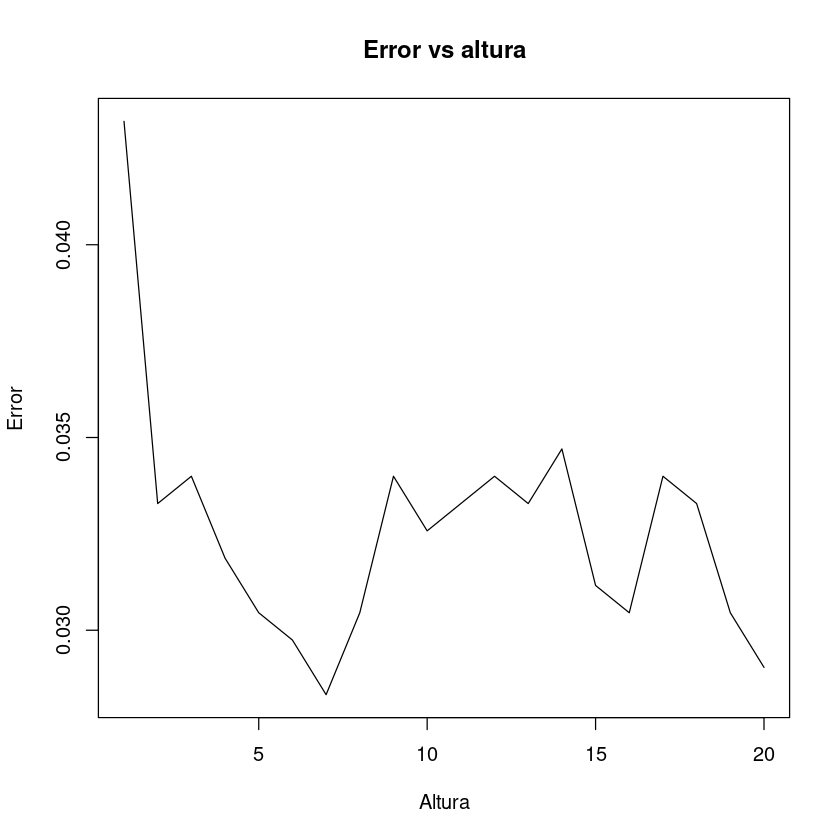

In [18]:
resultado <- c(1,0.04320113,2,0.03328612,3,0.03399433,4,0.03186969,5,0.03045326,6,0.02974504,7,0.02832861,8,0.03045326,9,0.03399433,10,0.03257790,11,0.03328612,12,0.03399433,13,0.03328612,14,0.03470255,15,0.03116147,16,0.03045326,17,0.03399433,18,0.03328612,19,0.03045326,20,0.02903683)
dim(resultado) <- c(2,20)
resultado <- t(resultado)
which.min(resultado[,2])
plot(resultado[,1], resultado[,2], type = "l", xlab = "Altura", ylab = "Error", main = "Error vs altura")

Al final copie los valores y defini la tabla a mano porque quería hacer el gráfico. También confirmo que el minimo error es con 7 variables :D.

Me sorprende el salto en pico que se da cuando paso de 7 a 8 variables. Intuyo que cuando empieza a forzar la altura más allá de lo normal, empieza a sobre-ajustar.


## Error con svm (RBF y Polinomial)

In [22]:
matriz.error.rbf.RRL <- matrix(0, ncol = 3, nrow = 0) # 3 columnas: gamma, cost, error
for (g in gammas) {
    for (c in costs) {
        suppressWarnings(res <- svm(Tipo ~ ., data = RRL.train, kernel = "radial", gamma = g, cost = c))
        pred <- predict(res, newdata = RRL.test)
        error <- mean(pred != RRL.test$Tipo)
        matriz.error.rbf.RRL <- rbind(matriz.error.rbf.RRL, c(g, c, error))
    }
}

In [24]:
matriz.error.poly.RRL <- matrix(0, ncol = 4, nrow = 0) # 4 columnas: gamma, cost, degree, error
for (g in gammas) {
    for (c in costs) {
        for (d in degrees) {
            suppressWarnings(res <- svm(Tipo ~ ., data = RRL.train, kernel = "polynomial", degree = d, gamma = g, cost = c))
            pred <- predict(res, newdata = RRL.test)
            error <- mean(pred != RRL.test$Tipo)
            matriz.error.poly.RRL <- rbind(matriz.error.poly.RRL, c(g, c, d, error))
        }
    }
}

In [25]:
matriz.error.poly.RRL[which.min(matriz.error.poly.RRL[, 4]), ]
matriz.error.rbf.RRL[which.min(matriz.error.rbf.RRL[, 3]), ]

[1]   0.01000000 100.00000000   4.00000000   0.09915014

[1] 1.000000e-03 1.000000e+03 8.073654e-02

Que más decir, parece que la mejor opción es boosting con árboles. Esta vez el error tiene más que hacer solo random forest asi que vale la pena el esfuerzo.

## Conclusión final

Este fué el tp que hice con más tiempo previo porque no tenia ganas de estar a las apuradas durante el partido de Argentina, además de que ya no curso y tengo más tiempo libre. También fue el que más entendí, no tuve tanto problema en adaptar los conceptos del enunciado a código.

No sabía que se podía hacer boosting con árboles porque en random forest se los usaba por su alta varianza. Después de pensarlo me acorde que la varianza provenía de ir modificando los datos de entrada y las variables, cuando los datos son iguales, el árbol es siempre igual con muy poca varianza :).

Soy fan de Random Forest porque no me hace separar en test y train.

Y recordé las primeras clases de gráficos de que la escala engaña.